In [84]:
import torch
import torch.nn as nn
from IPython.display import Image
from matplotlib import pyplot as plt

In [44]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

- requires_grad = True : 학습할 것이라고 명시
- Weight와 Bias 0으로 초기화

$$ y = Wx + b $$

In [45]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

## Mean Squared Error (MSE)

![title](img/cost.png)

In [46]:
cost = torch.mean((hypothesis-y_train)**2)

[ 한번만 ]
1. 데이터 정의
2. Hypothesis 초기화
3. Optimizer 정의
----------------------------------
[ 반복 ]
1. Hypothesis 예측
2. Cost 계산
3. Optimizer로 학습

----------------------------

In [47]:
# For reproducibility
torch.manual_seed(1)

## Data

In [48]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [49]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [50]:
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


## Weight Initialization

In [51]:
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [52]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


## Hypothesis

In [53]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## Cost

In [54]:
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [55]:
print(y_train)

tensor([[1.],
        [2.],
        [3.]])


In [56]:
print(hypothesis-y_train)

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)


In [57]:
print((hypothesis-y_train)**2)

tensor([[1.],
        [4.],
        [9.]], grad_fn=<PowBackward0>)


In [58]:
cost = torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


## Gradient Descent

In [59]:
optimizer = torch.optim.SGD([W, b], lr=0.01)

- zero_grad() : gradient 초기화
- backward() : gradient 계산
- step()으로 개선

In [60]:
optimizer.zero_grad()
cost.backward(retain_graph=True)
optimizer.step()

In [61]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


In [62]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [63]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(3.6927, grad_fn=<MeanBackward0>)


## Training with Full Code

In [65]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = torch.optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.093, b: 0.040 Cost: 4.666667
Epoch  100/1000 W: 0.873, b: 0.289 Cost: 0.012043
Epoch  200/1000 W: 0.900, b: 0.227 Cost: 0.007442
Epoch  300/1000 W: 0.921, b: 0.179 Cost: 0.004598
Epoch  400/1000 W: 0.938, b: 0.140 Cost: 0.002842
Epoch  500/1000 W: 0.951, b: 0.110 Cost: 0.001756
Epoch  600/1000 W: 0.962, b: 0.087 Cost: 0.001085
Epoch  700/1000 W: 0.970, b: 0.068 Cost: 0.000670
Epoch  800/1000 W: 0.976, b: 0.054 Cost: 0.000414
Epoch  900/1000 W: 0.981, b: 0.042 Cost: 0.000256
Epoch 1000/1000 W: 0.985, b: 0.033 Cost: 0.000158


# High-level Implementation with nn. Module

이제 linear regression 모델을 만들면 되는데, 기본적으로 PyTorch의 모든 모델은 제공되는 nn.Module을 inherit 해서 만들게 됩니다.

In [66]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [69]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1) # (1,1) --> 이게 무슨의미인지 모르곘는데..
    
    def forward(self, x):
        return self.linear(x)

모델의 $__init__$에서는 사용할 레이어들을 정의하게 됩니다. 여기서 우리는 linear regression 모델을 만들기 때문에, nn.Linear 를 이용할 것입니다. 그리고 forward에서는 이 모델이 어떻게 입력값에서 출력값을 계산하는지 알려줍니다.

In [70]:
model = LinearRegressionModel() #  -> y = w * x + b

## Hypothesis

이제 모델을 생성해서 예측값 $H(x)$를 구해보자

In [71]:
hypothesis = model(x_train)  # -> y = w * x_train + b

In [72]:
print(hypothesis)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


## Cost

In [74]:
print(hypothesis)
print(y_train)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)
tensor([[1.],
        [2.],
        [3.]])


In [75]:
cost = torch.nn.functional.mse_loss(hypothesis, y_train)

In [76]:
print(cost)

tensor(2.1471, grad_fn=<MseLossBackward>)


## Gradient Descent

마지막 주어진 cost를 이용해 $H(x)$ 의 $W, b$ 를 바꾸어서 cost를 줄여봅니다. 이때 PyTorch의 torch.optim 에 있는 optimizer 들 중 하나를 사용할 수 있습니다.

In [77]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [78]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

## Training with Full Code

이제 Linear Regression 코드를 이해했으니, 실제로 코드를 돌려 피팅시켜보겠습니다.

In [89]:
# Data
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화 --> y = W * x + b
model = LinearRegressionModel()

#optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01)

epochs = 1000
loss = []
for epoch in range(epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = torch.nn.functional.mse_loss(prediction, y_train)
    
    # cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} w:{:.3f}, b: {:.3f} Cost {:.6f}'.format(
            epoch, epochs, W, b, cost.item()
        ))
        loss.append(cost.item())

Epoch    0/1000 w:0.031, b: -0.045 Cost 5.766424
Epoch  100/1000 w:0.890, b: 0.251 Cost 0.009079
Epoch  200/1000 w:0.913, b: 0.197 Cost 0.005610
Epoch  300/1000 w:0.932, b: 0.155 Cost 0.003467
Epoch  400/1000 w:0.946, b: 0.122 Cost 0.002142
Epoch  500/1000 w:0.958, b: 0.096 Cost 0.001324
Epoch  600/1000 w:0.967, b: 0.075 Cost 0.000818
Epoch  700/1000 w:0.974, b: 0.059 Cost 0.000505
Epoch  800/1000 w:0.980, b: 0.047 Cost 0.000312
Epoch  900/1000 w:0.984, b: 0.037 Cost 0.000193
Epoch 1000/1000 w:0.987, b: 0.029 Cost 0.000119


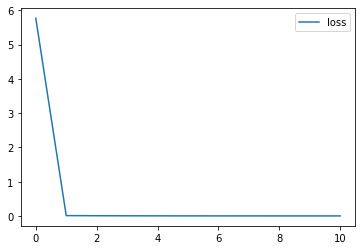

In [93]:
plt.plot(loss)
plt.legend(['loss'])
plt.show()